Proyecto 1: Primera exploración Relación Minutos Ingreso

In [57]:
#Importar libreria
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
#Cargar el conjunto de datos
df=pd.read_csv('../Datos/minutos.csv')


In [61]:
#Información básica de los datos
# dimensión del conjunto de datos (filas, columnas)
print("\nDimensión del conjunto de datos (filas, columnas):")
print(df.shape)


Dimensión del conjunto de datos (filas, columnas):
(10000, 5)


In [63]:
# información general del DataFrame
print("\nInformación general del DataFrame:")
df.info()


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   totmou       10000 non-null  float64
 1   totrev       10000 non-null  float64
 2   creditcd     9848 non-null   object 
 3   eqpdays      10000 non-null  int64  
 4   Customer_ID  10000 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 390.8+ KB


In [65]:
# Identificar valores faltantes
display(df.isnull().sum())

totmou           0
totrev           0
creditcd       152
eqpdays          0
Customer_ID      0
dtype: int64

In [71]:
# Utilizar mépetodo de imputación para la variable creditcd usando la moda
df['creditcd'].fillna(df['creditcd'].mode()[0], inplace=True)

In [73]:
# verificar de nuevo valores faltantes
display(df.isnull().sum())

totmou         0
totrev         0
creditcd       0
eqpdays        0
Customer_ID    0
dtype: int64

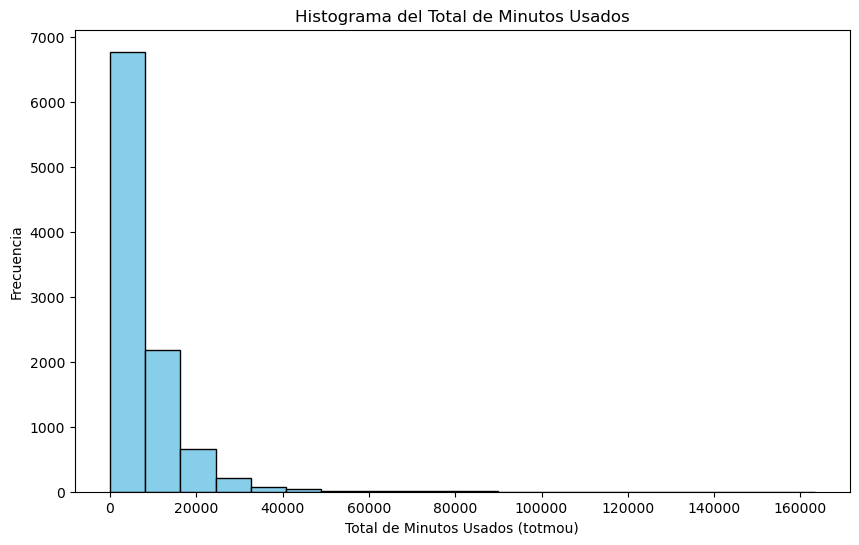

In [75]:
# Análisis de la variable totmou
plt.figure(figsize=(10, 6))
plt.hist(df['totmou'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Total de Minutos Usados (totmou)')
plt.ylabel('Frecuencia')
plt.title('Histograma del Total de Minutos Usados')
plt.show()

# Análisis del histograma: 
# - La primera barra muestra el Pico de la distribució la cual encuentra el valor más frecuente de minutos usados, que en este caso es el valor más bajo

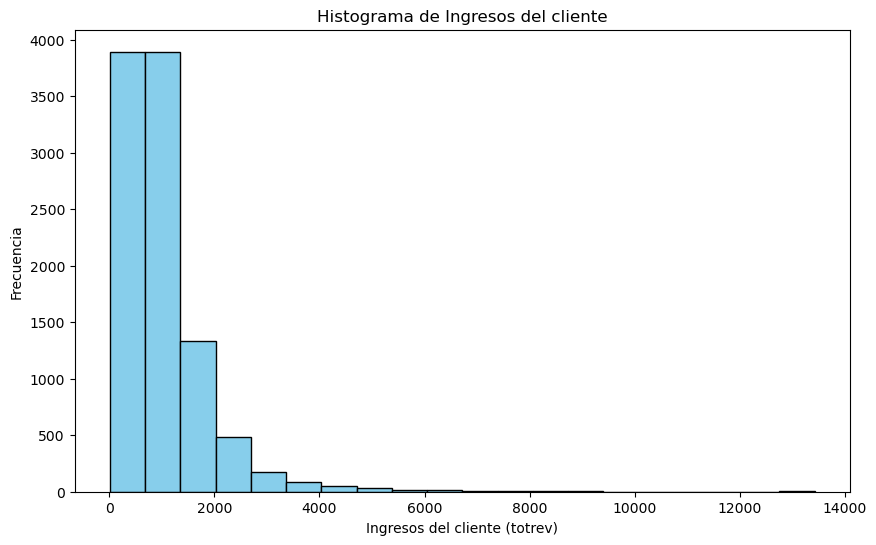

In [79]:
# Análisis de la variable totrev
plt.figure(figsize=(10, 6))
plt.hist(df['totrev'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Ingresos del cliente (totrev)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Ingresos del cliente')
plt.show()

# Análisis del histograma:
# - La mayoría de los clientes tienen ingresos relativamente bajos, pero hay un número menor de clientes que generan ingresos significativamente más altos.
# - Al igual que con la anterior variable, El histograma muestra el pico de la distribución en los valores más bajos. 

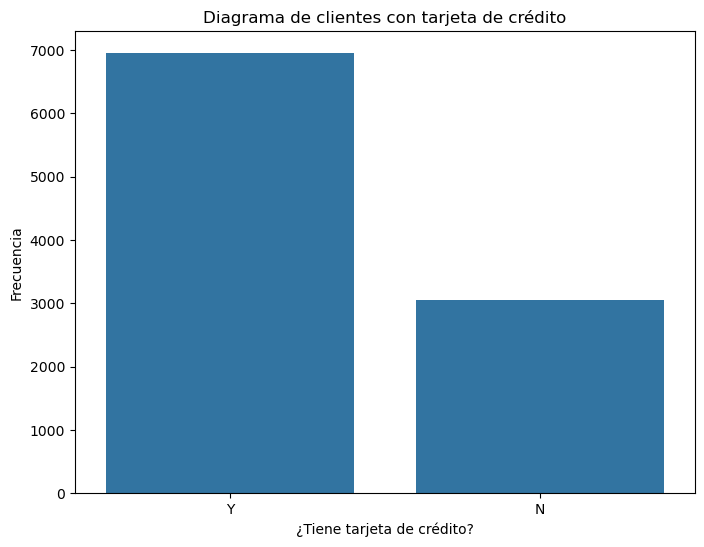


Frecuencia de valores en 'creditcd':
creditcd
Y    6948
N    3052
Name: count, dtype: int64


In [81]:
# Análisis de la variable creditcd
plt.figure(figsize=(8, 6))
sns.countplot(x='creditcd', data=df)
plt.xlabel('¿Tiene tarjeta de crédito?')
plt.ylabel('Frecuencia')
plt.title('Diagrama de clientes con tarjeta de crédito')
plt.show()

# Contar la frecuencia de cada valor en la columna 'creditcd'
creditcd_counts = df['creditcd'].value_counts()
print("\nFrecuencia de valores en 'creditcd':")
print(creditcd_counts)

# Análisis del Gráfico:
# - Observación: Tener en cuenta que esta variable estuvo sujeta a método de imputación (al rededor de 150 entradas)
# - Se observa que la mayoría de de usuarios tenen crédito/tarjeta de crédito Y=6948 y N=3052.


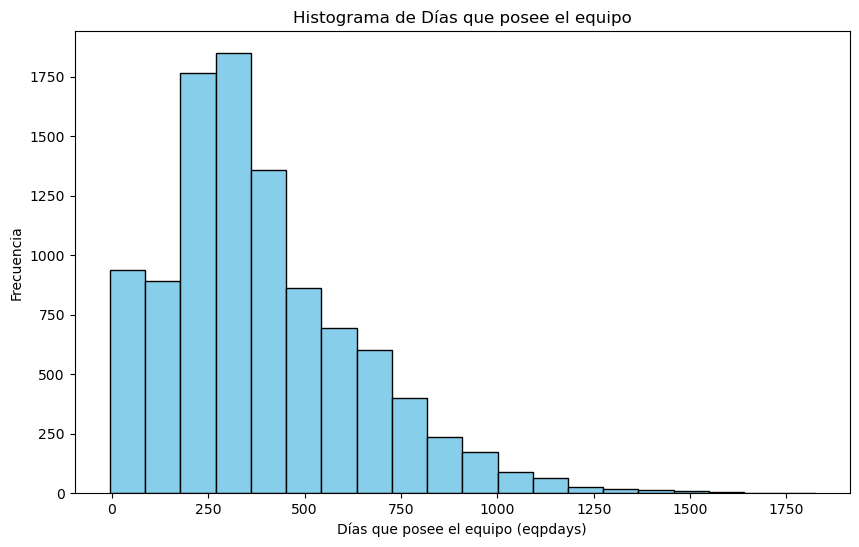

In [85]:
# Análisis de la variable eqpdays:
plt.figure(figsize=(10, 6))
plt.hist(df['eqpdays'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Días que posee el equipo (eqpdays)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Días que posee el equipo')
plt.show()


# Análisis del histograma:
# - La mayor parte de los clientes tienen entre 0 y 500 días que poseen el equipo.
# - Una porción baja de los usuarios tienen el equipo por más de mil días 

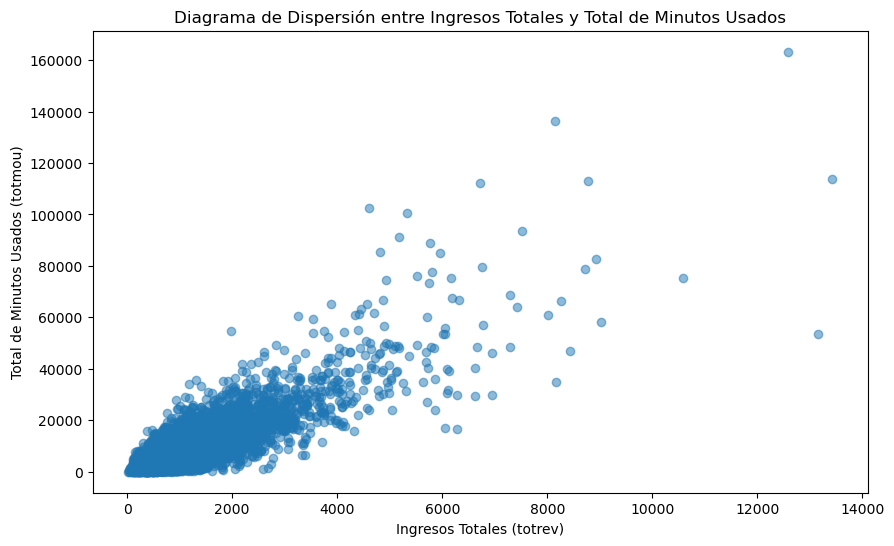

In [87]:
# Diagrama de dispersión entre totrev y totmou
plt.figure(figsize=(10, 6))
plt.scatter(df['totrev'], df['totmou'], alpha=0.5)
plt.xlabel('Ingresos Totales (totrev)')
plt.ylabel('Total de Minutos Usados (totmou)')
plt.title('Diagrama de Dispersión entre Ingresos Totales y Total de Minutos Usados')
plt.show()

Interpretación de Diagrama de dispersión entre totrev y totmou:

Si bien se muestra una relación lineal entre las variables, se debe tener en cuenta que no es clara, ya que la concentración de los datos se encuentra en los valores más bajos de las dos variables, lo que dificulta asegurar que a más ingresos fijo haya más minutos usados. Además hay una disperción significativa en los datos a partir del valor 6000 en la variable de ingresos totales.

¿Existe relación alguna entre el total de minutos usados con la compañía y el ingreso total de los clientes?

Si bien hay una relación lineal leve, esta no explica completamente el comportamiento del consumo de minutos de acuerdo a los ingresos, ya que hay una concentración de datos muy significativa en los valores mínimos de cada variable, por lo que valdría la pena analizar otros aspectos, mas allá del ingreso, que nos ayuden a entender el comportamientoi de los usuarios en cuanto al consumo, se procede a cruzar este diagrama con los valores de la variable creditcd para encontrar relaciones:

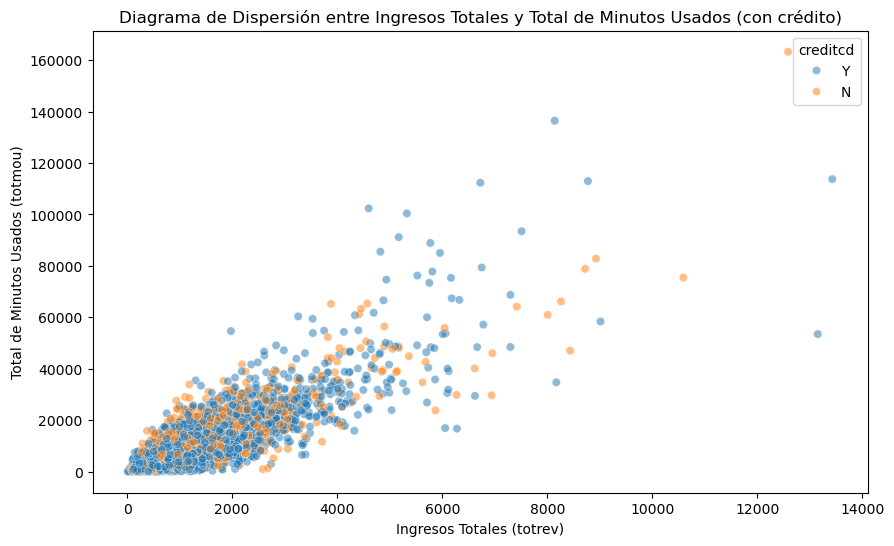

In [90]:
# Actualziar diagrama de dispersión entre totrev y totmou con creditcd
plt.figure(figsize=(10, 6))
sns.scatterplot(x='totrev', y='totmou', hue='creditcd', data=df, alpha=0.5)
plt.xlabel('Ingresos Totales (totrev)')
plt.ylabel('Total de Minutos Usados (totmou)')
plt.title('Diagrama de Dispersión entre Ingresos Totales y Total de Minutos Usados (con crédito)')
plt.show()

Interpretación de nuevo diagrama de dispersión, entendiendo que los valores de la variable categórica son, para Y:6948, y para N:305, podemos concluír lo siguiente:

Distribución de ingresos:
teniendo en cuenta que la mayoría de los puntos se ubican en el la franja menor de valores para las dos variables, se ve una leve tendencia en los puntos azules (usan tarjeta de crédito), lo que sugiere una parte de los clientes  de ingresos por encima  de 5000 y usan muchos minutos, tienden a usar tarjetas de crédito.
pero a grandes rasgos, se ve que la mayoría de personas que usan tarjeta de crédito, están dispersas en el diagrama.

In [92]:
# se procede a actualizar la variable categórica creditcd para generar resultados numéricos
df['creditcd'] = df['creditcd'].map({'Y': 1, 'N': 0})
print(df.head())

    totmou   totrev  creditcd  eqpdays  Customer_ID
0   7269.0   906.58         1      371      1082423
1  13552.0  1172.25         0       83      1069232
2   4152.0   577.39         1      675      1031705
3   1863.0   294.26         1      218      1089806
4   4155.0   433.16         0      222      1076695


In [94]:
#Análsis de variables:
# Medidas estadísticas descriptivas
print("\nMedidas estadísticas descriptivas:")
print(df.describe())


Medidas estadísticas descriptivas:
              totmou        totrev      creditcd       eqpdays   Customer_ID
count   10000.000000  10000.000000  10000.000000  10000.000000  1.000000e+04
mean     7692.804866   1042.133807      0.694800    386.794500  1.049965e+06
std      8657.917883    857.144895      0.460515    252.720196  2.879424e+04
min         0.000000     11.100000      0.000000     -5.000000  1.000014e+06
25%      2576.000000    526.787500      0.000000    210.000000  1.025053e+06
50%      5262.000000    820.235000      1.000000    338.000000  1.049652e+06
75%      9823.250000   1272.975000      1.000000    522.000000  1.074798e+06
max    163264.176700  13426.600000      1.000000   1823.000000  1.099992e+06


#Información relevante de medidas estadísticas por variable:

totmou:
- el valor de la desviación nos indica dispersión en los minutos usados.
- Una mediana de 5262 minutos.
- Se presenta como valor minimo 0, lo que nos indica clientes que no usan minutos.

totrev: 
- un valor promedio de 1042
- Su std indica una desviación moderada.
- ingresos mínimos de 11.
- el ingreso mediano por cliente es de 820.
- el 75% de los usuarios genera menos de 1272
- el valor máximo está muy por encima de lo que gana el 75% de los usuarios.

creditcd:
- el 69% de los  usan tarjeta de crédito.
  
eqpdays:

- Hay un valor -5, el cual parece ser un error en los datos.
- El 25% de los equipos tiene una antigüedad de menos de 210 días
- El valor mediano en el que los usuarios tienen el equipo es de 338 días.
- El 75% de los usuarios tienen equipos con menos de 522 días de antigüedad.
